Swoyam Thapa Magar

Uni ID: 2408839

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Exploratory Data Analysis and Data Understanding

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/AI coursework/placementdata.csv')

# Displaying the first few rows of the dataset
print("Dataset Preview:")
df.head()

Dataset Preview:


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
# Dataset description
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# List of attributes (columns)
columns = df.columns.tolist()
print("\nList of Attributes (Columns):")
print(columns)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None

Summary Statisti

Data Cleaning and Summary Statistics

In [ ]:
df = df.drop(['StudentID'], axis=1)

# Replacing categorical data to numeric
df["PlacementStatus"] = df["PlacementStatus"].map({"Placed": 1, "NotPlaced": 0})
df["ExtracurricularActivities"] = df["ExtracurricularActivities"].map({"Yes": 1, "No": 0})
df["PlacementTraining"] = df["PlacementTraining"].map({"Yes": 1, "No": 0})
print(df.head())

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

#Dropping duplicate datas
df= df.drop_duplicates()

   CGPA  Internships  Projects  Workshops/Certifications  AptitudeTestScore  \
0   7.5            1         1                         1                 65   
1   8.9            0         3                         2                 90   
2   7.3            1         2                         2                 82   
3   7.5            1         1                         2                 85   
4   8.3            1         2                         2                 86   

   SoftSkillsRating  ExtracurricularActivities  PlacementTraining  SSC_Marks  \
0               4.4                          0                  0         61   
1               4.0                          1                  1         78   
2               4.8                          1                  0         79   
3               4.4                          1                  1         81   
4               4.5                          1                  1         74   

   HSC_Marks  PlacementStatus  
0         79

 Exploring the Data through Visualizations

<ipython-input-5-df75716c8ae2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="PlacementStatus", palette="coolwarm")


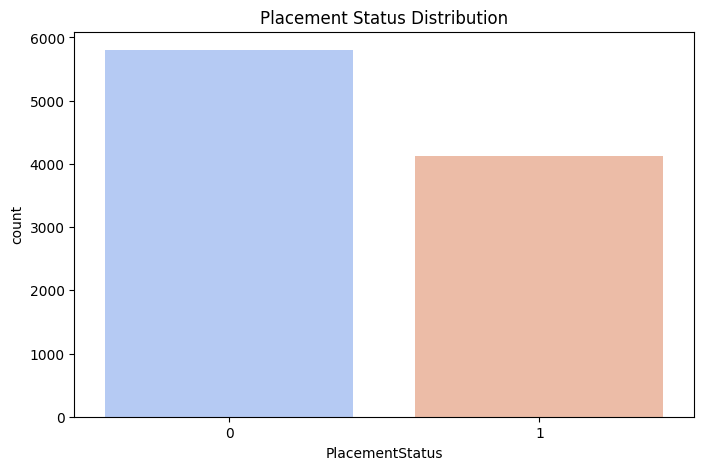

In [ ]:
# Visualizing the distribution of PlacementStatus
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="PlacementStatus", palette="coolwarm")
plt.title("Placement Status Distribution")
plt.show()



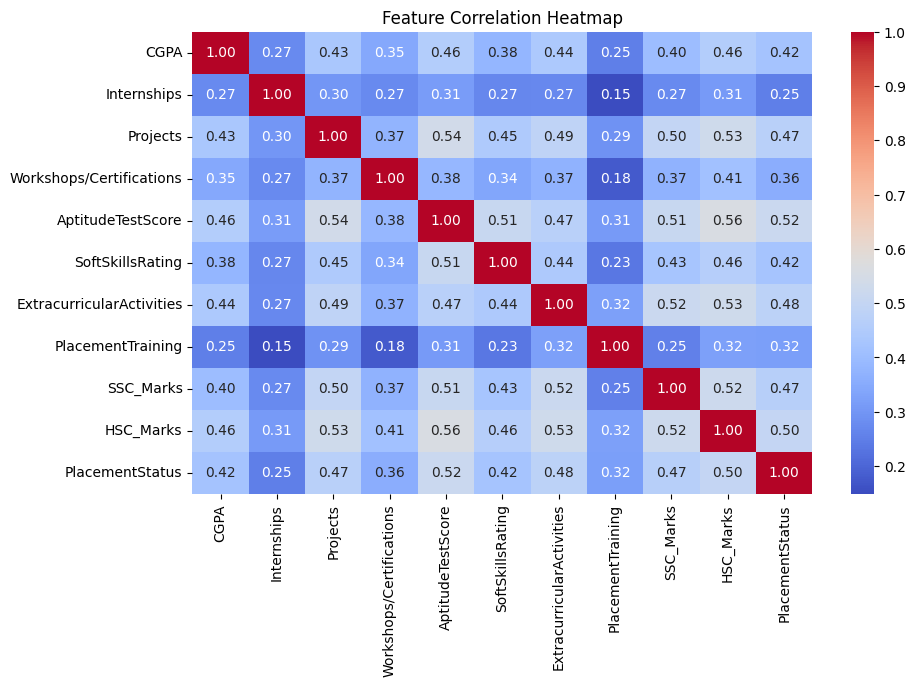

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

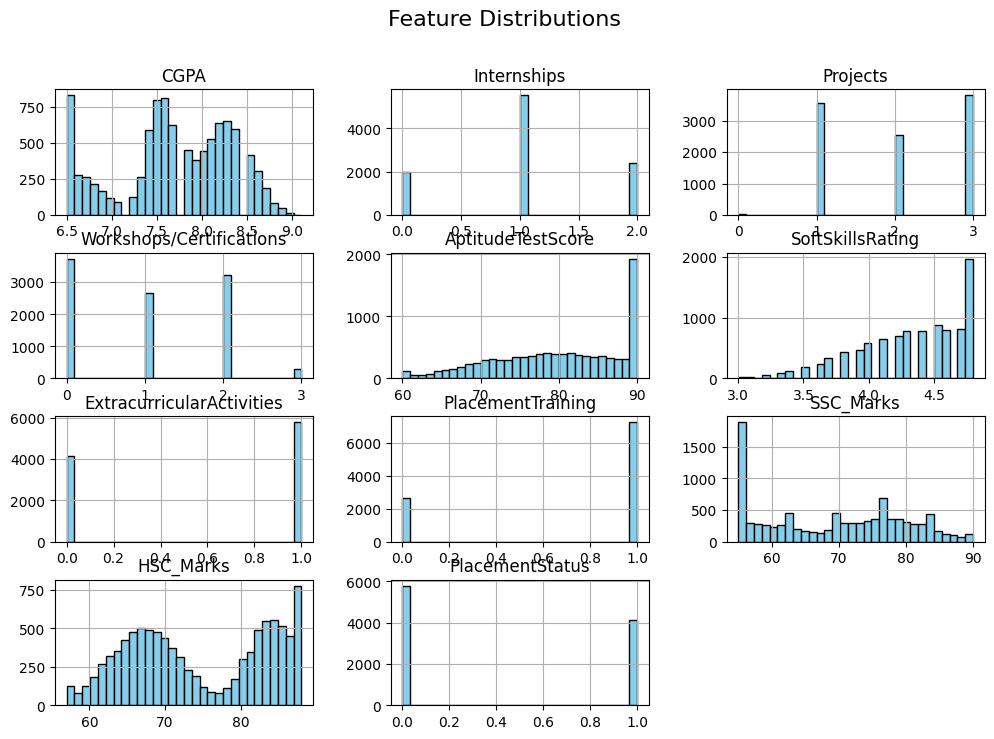

In [ ]:
# Feature Distributions
df.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

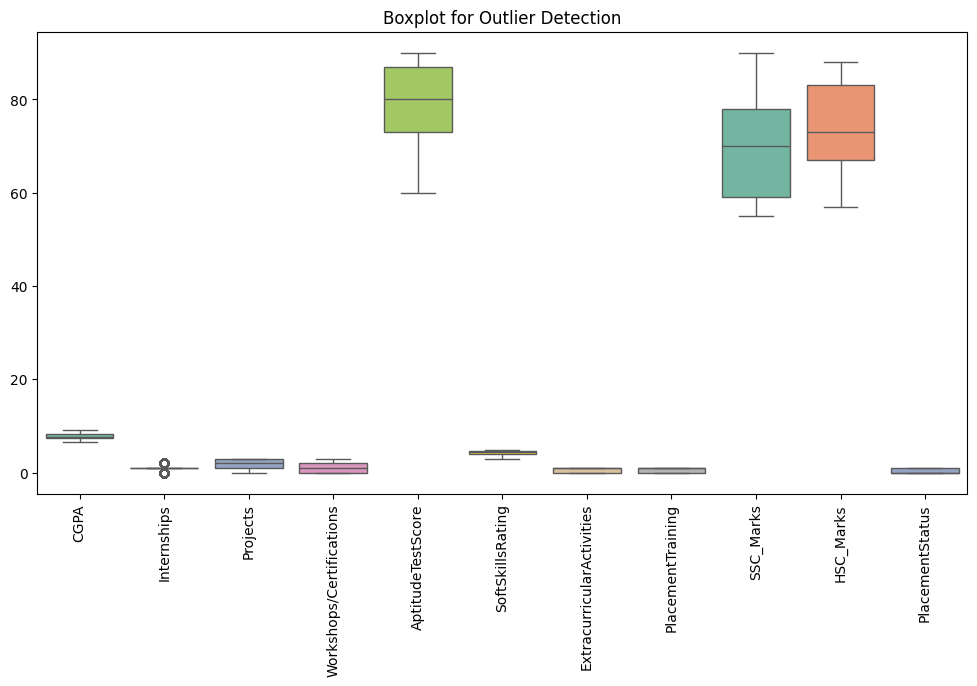

In [ ]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

Build a Model from Scratch

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

X = df.drop(columns=["PlacementStatus"])
Y = df["PlacementStatus"]

if X.shape[0] == Y.shape[0]:
  print("Progress Further")
else:
  print("X and Y are not created correctly")


Progress Further


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
if x_train.shape[0] == y_train.shape[0]:
  print("Progress Further")
else:
  print("x_train and y_train are not created correctly")

Progress Further


In [ ]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np
  y = 1 / (1 + np.exp(-x))
  return y

In [ ]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.
  Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
  Returns:
    loss (float): loss/error value
  """
  import numpy as np
  loss = -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
  return loss

In [ ]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = sum(log_loss(y_true, y_pred))
    cost = loss_vec/n
    return cost

In [ ]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = X.dot(w) + b
    y_pred = 1/(1+np.exp(-z))
    cost = cost_function(y, y_pred)
    return cost

In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    y_pred = logistic_function(np.dot(X, w) + b)
    grad_w = (1/m)* X.T.dot(y_pred - y)
    grad_b = (1/m)* np.sum(y_pred - y)
    return grad_w, grad_b

In [ ]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False):
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      cost_func                 : function to compute cost
      grad_func                 : function to compute gradients of cost with respect to model parameters
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    from tqdm.contrib import itertools
    import math
    import tqdm
    from time import sleep
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w += -alpha * grad_w
        b += -alpha * grad_b
        cost =  costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])


    return w, b, cost_history, params_history

Scaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Initializing parameters
n_features = x_train_scaled.shape[1]
w = np.zeros(n_features)  # Initializing weights as zeros
b = 0  # Initializing bias as 0

In [ ]:
# Setting hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Running gradient descent
w_optimized, b_optimized, cost_history, params_history = gradient_descent(
    x_train_scaled, y_train, w, b, learning_rate, num_iterations
)

# Print final parameters
print("Optimized weights (w):", w_optimized)
print("Optimized bias (b):", b_optimized)

  0%|          | 0/1000 [00:00<?, ?it/s]

Optimized weights (w): [0.24044349 0.05276804 0.24636332 0.16853597 0.38390347 0.25739739
 0.310981   0.31420499 0.27440043 0.29283923]
Optimized bias (b): -0.4038600413143907


In [ ]:
# Making predictions on the test set
y_pred_prob = logistic_function(np.dot(x_test_scaled, w_optimized) + b_optimized)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.8016112789526687

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1787
           1       0.73      0.80      0.76      1192

    accuracy                           0.80      2979
   macro avg       0.79      0.80      0.80      2979
weighted avg       0.81      0.80      0.80      2979

Confusion Matrix:
[[1437  350]
 [ 241  951]]


Build a Primary Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

# Initializing Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train_scaled, y_train)

# Making predictions
y_pred_tree = tree_model.predict(x_test_scaled)

# Model evaluation
f1_rf = f1_score(y_test, y_pred_tree, average='weighted')
print(f"Decision Tree F1 Score: {f1_rf:.4f}")
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_tree)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_tree)}")
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

Decision Tree F1 Score: 0.7107
Decision Tree Evaluation:
Accuracy: 0.7099697885196374
Confusion Matrix:
[[1337  450]
 [ 414  778]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1787
           1       0.63      0.65      0.64      1192

    accuracy                           0.71      2979
   macro avg       0.70      0.70      0.70      2979
weighted avg       0.71      0.71      0.71      2979



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(x_test_scaled)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Random Forest F1 Score: 0.7970
Confusion Matrix:
[[1505  282]
 [ 321  871]]
Accuracy: 0.797583081570997
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1787
           1       0.76      0.73      0.74      1192

    accuracy                           0.80      2979
   macro avg       0.79      0.79      0.79      2979
weighted avg       0.80      0.80      0.80      2979



Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Tree
tree_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring="accuracy")
grid_tree.fit(x_train_scaled, y_train)

# Best hyperparameters for Decision Tree
print("\nBest Parameters for Decision Tree:")
print(grid_tree.best_params_)

# Hyperparameter tuning for Random Forest
rf_params = {
    "n_estimators": [100, 150, 200],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 3, 5, 7, 10],
    "min_samples_leaf": [1, 3, 5],
    "bootstrap": [True, False]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="accuracy")
grid_rf.fit(x_train_scaled, y_train)

# Best hyperparameters for Random Forest
print("\nBest Parameters for Random Forest:")
print(grid_rf.best_params_)



Best Parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best Parameters for Random Forest:
{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Feature selection

In [ ]:
from sklearn.feature_selection import RFE

# Initializing DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=tree_clf, n_features_to_select=5)
rfe.fit(x_train_scaled, y_train)

# Selecting important features using RFE
selected_features_tree = X.columns[rfe.support_]
print("Selected Features for Decision Tree:", selected_features_tree)
print(f"Feature Ranking: {rfe.ranking_}")

Selected Features for Decision Tree: Index(['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks',
       'HSC_Marks'],
      dtype='object')
Feature Ranking: [1 4 5 3 1 1 2 6 1 1]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Initializing RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Selecting important features using SelectFromModel
selector = SelectFromModel(rf, threshold="mean", prefit=True)
X_train_selected = selector.transform(x_train_scaled)
X_test_selected = selector.transform(x_test_scaled)

print(f"Selected Features: {X.columns[selector.get_support()]}")

Selected Features: Index(['CGPA', 'AptitudeTestScore', 'SSC_Marks', 'HSC_Marks'], dtype='object')


Final model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

selected_features_rf = ['HSC_Marks', 'AptitudeTestScore', 'SSC_Marks', 'CGPA']

# Rebuilding Random Forest model with optimal hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf= 5, bootstrap= True )
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)

# Evaluating Random Forest
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("\nRandom Forest Evaluation:")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")



Random Forest Evaluation:
Random Forest F1 Score: 0.8025
Confusion Matrix:
[[1484  303]
 [ 286  906]]
Accuracy: 0.8022826451829473
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1787
           1       0.75      0.76      0.75      1192

    accuracy                           0.80      2979
   macro avg       0.79      0.80      0.79      2979
weighted avg       0.80      0.80      0.80      2979



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


selected_features_rf = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks',
       'HSC_Marks']

# Rebuilding Decision tree model with optimal hyperparameters
rf = DecisionTreeClassifier(criterion= 'gini', max_depth=5, min_samples_split=3, min_samples_leaf= 4)
rf.fit(x_train_scaled, y_train)
y_pred_tree = rf.predict(x_test_scaled)

# Evaluating Decision tree
f1_rf = f1_score(y_test, y_pred_tree, average='weighted')
print("\nDecision tree Evaluation:")
print(f"Decision tree F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_tree)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_tree)}")



Decision tree Evaluation:
Decision tree F1 Score: 0.7867
Confusion Matrix:
[[1451  336]
 [ 301  891]]
Accuracy: 0.7861698556562605
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1787
           1       0.73      0.75      0.74      1192

    accuracy                           0.79      2979
   macro avg       0.78      0.78      0.78      2979
weighted avg       0.79      0.79      0.79      2979



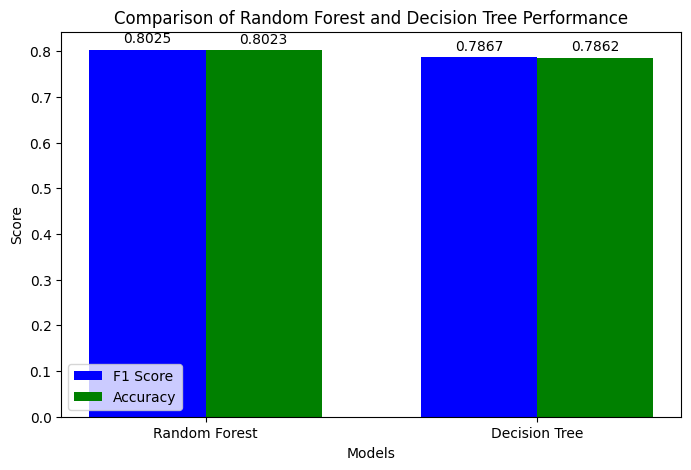

In [ ]:
# Computing F1-score for Random Forest
f1_rf_random_forest = f1_score(y_test, y_pred_rf, average='weighted')

# Computing F1-score for Decision Tree
f1_rf_decision_tree = f1_score(y_test, y_pred_tree, average='weighted')

# Model names and their respective scores
models = ["Random Forest", "Decision Tree"]
f1_scores = [f1_rf_random_forest, f1_rf_decision_tree]
accuracy_scores = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_tree)]

# Bar width
bar_width = 0.35

# X positions for bars
x = np.arange(len(models))

# Plot F1-score and Accuracy comparison
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - bar_width/2, f1_scores, bar_width, label='F1 Score', color='blue')
bars2 = ax.bar(x + bar_width/2, accuracy_scores, bar_width, label='Accuracy', color='green')

# Labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Comparison of Random Forest and Decision Tree Performance")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
# Display values on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Show plot
plt.show()


In [ ]:
# Determine which model performed better
best_model_f1 = models[np.argmax(f1_scores)]
best_model_accuracy = models[np.argmax(accuracy_scores)]

print(f"\nModel with highest F1 Score: {best_model_f1} ({max(f1_scores):.4f})")
print(f"Model with highest Accuracy: {best_model_accuracy} ({max(accuracy_scores):.4f})")


Model with highest F1 Score: Random Forest (0.8025)
Model with highest Accuracy: Random Forest (0.8023)
